# Lattice models

## Introduction
In quantum physics (including condensed matter physics and high energy physics) we often study models on lattices. 
For example, when we think about behavior of electrons in a solid, we can study a model defined on a lattice by considering the positions of atoms as lattice points.
This notebook demonstrates how we can utilize `Lattice` classes to generate various lattice systems such as `LineLattice`, `SquareLattice`, `HyperCubicLattice`, `TriangularLattice`, and a general lattice. 
It also includes an example of a lattice model, the Fermi-Hubbard model. 
We see how we can define the Hamiltonian of the Fermi-Hubbard model for a given lattice using `FermiHubbardModel` class. 

In [1]:
from math import pi

import numpy as np
import rustworkx as rx
from qiskit_nature.second_q.hamiltonians.lattices import (
    BoundaryCondition,
    HyperCubicLattice,
    Lattice,
    LatticeDrawStyle,
    LineLattice,
    SquareLattice,
    TriangularLattice,
)
from qiskit_nature.second_q.hamiltonians import FermiHubbardModel

## LineLattice
`LineLattice` provides a one-dimensional lattice.
We can construct a one-dimensional lattice as follows.

In [2]:
num_nodes = 11
boundary_condition = BoundaryCondition.OPEN
line_lattice = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)

Here, it is visualized.

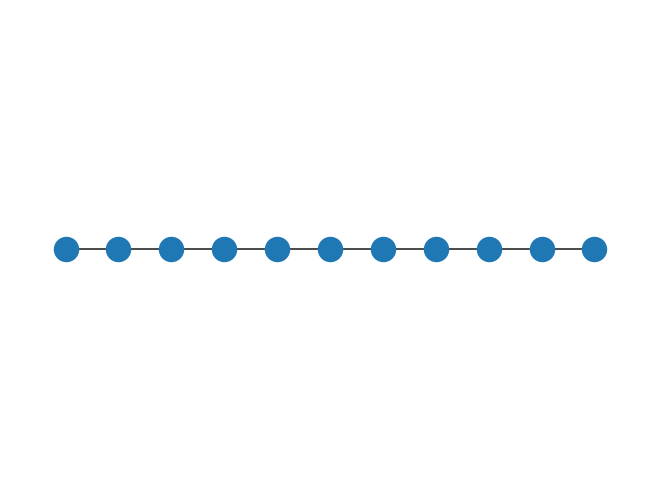

In [3]:
line_lattice.draw()

We can also construct a one-dimensional lattice with the periodic boundary conditions by specifying `BoundaryCondition.PERIODIC` as the argument of `boundary_condition`.

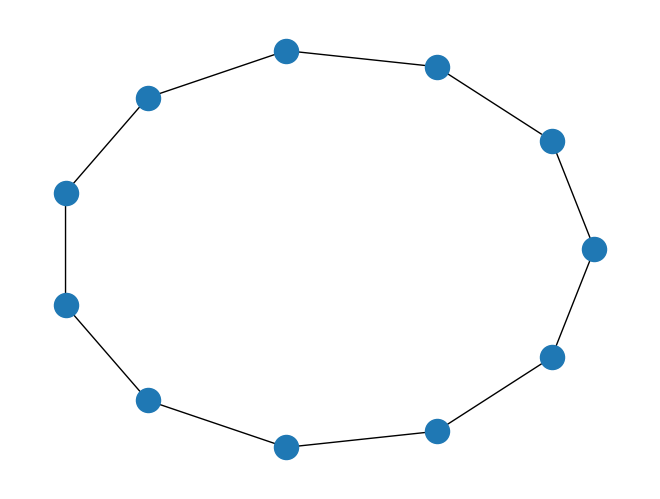

In [4]:
num_nodes = 11
boundary_condition = BoundaryCondition.PERIODIC
line_lattice = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)

line_lattice.draw()

When we want to draw the lattice ignoring the boundary conditions, we use the method `draw_without_boundary`.

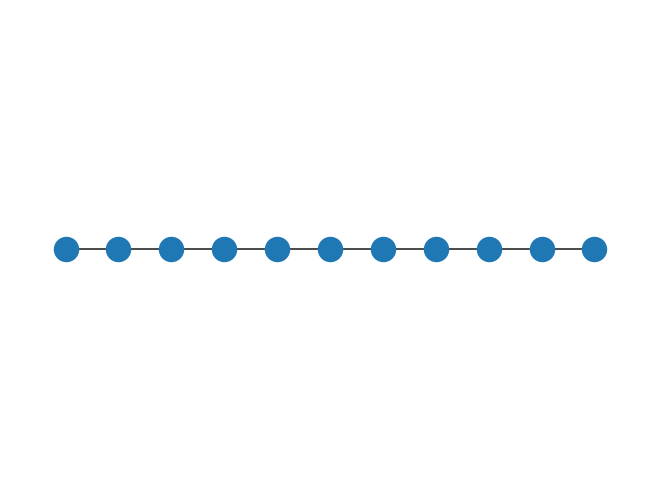

In [5]:
line_lattice.draw_without_boundary()

We can define real or complex weights for the edges of the lattice.
This is done by giving a value to the argument `edge_parameter`.
We can also give a value for the self-loops of the lattice by passing the value for `onsite_parameter`.

In [6]:
num_nodes = 11
boundary_condition = BoundaryCondition.PERIODIC
edge_parameter = 1.0 + 1.0j
onsite_parameter = 1.0
line_lattice = LineLattice(
    num_nodes=num_nodes,
    edge_parameter=edge_parameter,
    onsite_parameter=onsite_parameter,
    boundary_condition=boundary_condition,
)
set(line_lattice.graph.weighted_edge_list())

{(0, 0, 1.0),
 (0, 1, (1+1j)),
 (0, 10, (1-1j)),
 (1, 1, 1.0),
 (1, 2, (1+1j)),
 (2, 2, 1.0),
 (2, 3, (1+1j)),
 (3, 3, 1.0),
 (3, 4, (1+1j)),
 (4, 4, 1.0),
 (4, 5, (1+1j)),
 (5, 5, 1.0),
 (5, 6, (1+1j)),
 (6, 6, 1.0),
 (6, 7, (1+1j)),
 (7, 7, 1.0),
 (7, 8, (1+1j)),
 (8, 8, 1.0),
 (8, 9, (1+1j)),
 (9, 9, 1.0),
 (9, 10, (1+1j)),
 (10, 10, 1.0)}

The connectivity of the lattice can be seen as the adjacency matrix, which is done by `to_adjacency_matrix`.

In [7]:
line_lattice.to_adjacency_matrix()

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

By setting `weighted=True`, we obtain a Hermitian matrix whose matrix elements are the weights.

In [8]:
line_lattice.to_adjacency_matrix(weighted=True)

array([[1.+0.j, 1.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 1.-1.j],
       [1.-1.j, 1.+0.j, 1.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-1.j, 1.+0.j, 1.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-1.j, 1.+0.j, 1.+1.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-1.j, 1.+0.j, 1.+1.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-1.j, 1.+0.j, 1.+1.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-1.j, 1.+0.j, 1.+1.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-1.j, 1.+0.j,
        1.+1.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-1.j,
        1.+0.j, 1.+1.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,

## SquareLattice
`SquareLattice` provides a two-dimensional lattice.
Here, we make a two-dimensional lattice with the open boundary conditions.

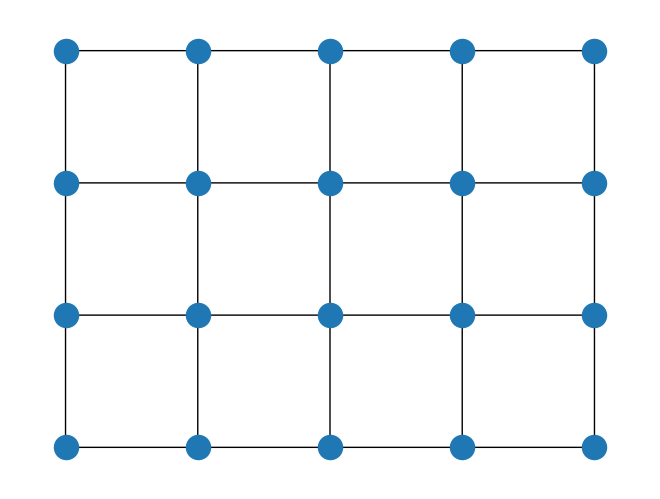

In [9]:
rows = 5
cols = 4
boundary_condition = BoundaryCondition.OPEN
square_lattice = SquareLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)

square_lattice.draw()

We can specify the boundary conditions for each direction by setting `boundary_condition` as a tuple.

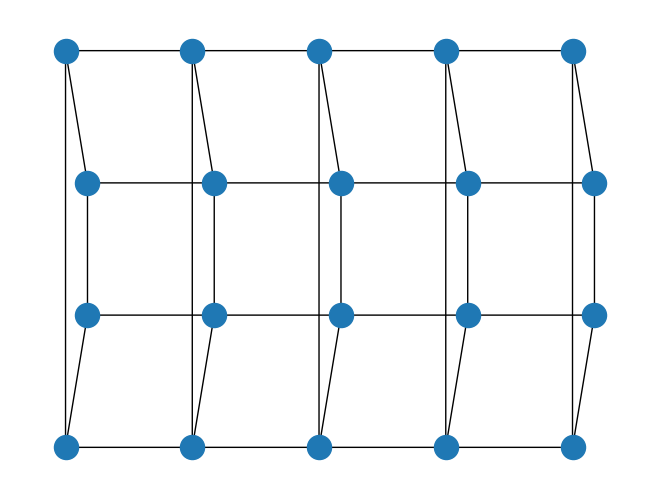

In [10]:
rows = 5
cols = 4
boundary_condition = (
    BoundaryCondition.OPEN,
    BoundaryCondition.PERIODIC,
)  # open in the x-direction, periodic in the y-direction
square_lattice = SquareLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)

square_lattice.draw()

Again, we can give weights on the edges and the self-loops of the lattice.
Here, it is possible to give weights for each direction as a tuple.

In [11]:
rows = 5
cols = 4
edge_parameter = (1.0, 1.0 + 1.0j)
boundary_condition = (
    BoundaryCondition.OPEN,
    BoundaryCondition.PERIODIC,
)  # open in the x-direction, periodic in the y-direction
onsite_parameter = 1.0
square_lattice = SquareLattice(
    rows=rows,
    cols=cols,
    edge_parameter=edge_parameter,
    onsite_parameter=onsite_parameter,
    boundary_condition=boundary_condition,
)

set(square_lattice.graph.weighted_edge_list())

{(0, 0, 1.0),
 (0, 1, 1.0),
 (0, 5, (1+1j)),
 (0, 15, (1-1j)),
 (1, 1, 1.0),
 (1, 2, 1.0),
 (1, 6, (1+1j)),
 (1, 16, (1-1j)),
 (2, 2, 1.0),
 (2, 3, 1.0),
 (2, 7, (1+1j)),
 (2, 17, (1-1j)),
 (3, 3, 1.0),
 (3, 4, 1.0),
 (3, 8, (1+1j)),
 (3, 18, (1-1j)),
 (4, 4, 1.0),
 (4, 9, (1+1j)),
 (4, 19, (1-1j)),
 (5, 5, 1.0),
 (5, 6, 1.0),
 (5, 10, (1+1j)),
 (6, 6, 1.0),
 (6, 7, 1.0),
 (6, 11, (1+1j)),
 (7, 7, 1.0),
 (7, 8, 1.0),
 (7, 12, (1+1j)),
 (8, 8, 1.0),
 (8, 9, 1.0),
 (8, 13, (1+1j)),
 (9, 9, 1.0),
 (9, 14, (1+1j)),
 (10, 10, 1.0),
 (10, 11, 1.0),
 (10, 15, (1+1j)),
 (11, 11, 1.0),
 (11, 12, 1.0),
 (11, 16, (1+1j)),
 (12, 12, 1.0),
 (12, 13, 1.0),
 (12, 17, (1+1j)),
 (13, 13, 1.0),
 (13, 14, 1.0),
 (13, 18, (1+1j)),
 (14, 14, 1.0),
 (14, 19, (1+1j)),
 (15, 15, 1.0),
 (15, 16, 1.0),
 (16, 16, 1.0),
 (16, 17, 1.0),
 (17, 17, 1.0),
 (17, 18, 1.0),
 (18, 18, 1.0),
 (18, 19, 1.0),
 (19, 19, 1.0)}

## HyperCubicLattice
`HyperCubicLattice` is a generalization of `LineLattice` and `SquareLattice`. 
It provides an arbitrary d-dimensional lattice.
Here, we make a three-dimensional lattice of size 3 by 4 by 5 as an example.
The size is given as a tuple, and the boundary conditions can be specified for each direction too.
In the example, the boundary conditions are open.

In [12]:
size = (3, 4, 5)
boundary_condition = (
    BoundaryCondition.OPEN,
    BoundaryCondition.OPEN,
    BoundaryCondition.OPEN,
)
cubic_lattice = HyperCubicLattice(size=size, boundary_condition=boundary_condition)

We draw the cubic lattice specifying the positions of the lattice points.

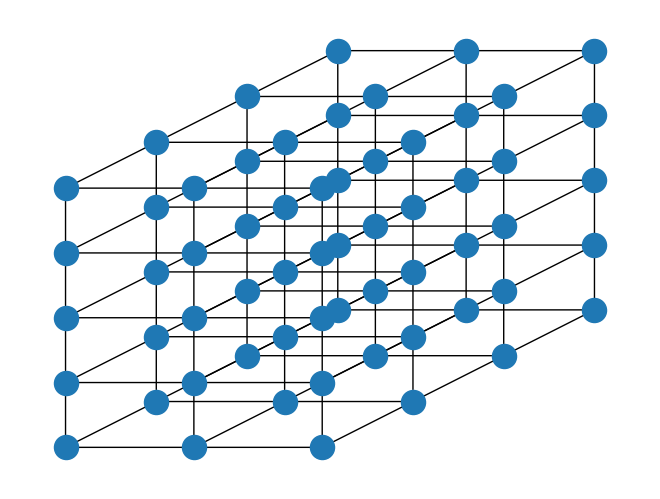

In [13]:
# function for setting the positions
def indextocoord_3d(index: int, size: tuple, angle) -> list:
    z = index // (size[0] * size[1])
    a = index % (size[0] * size[1])
    y = a // size[0]
    x = a % size[0]
    vec_x = np.array([1, 0])
    vec_y = np.array([np.cos(angle), np.sin(angle)])
    vec_z = np.array([0, 1])
    return_coord = x * vec_x + y * vec_y + z * vec_z
    return return_coord.tolist()


pos = dict([(index, indextocoord_3d(index, size, angle=pi / 4)) for index in range(np.prod(size))])

cubic_lattice.draw(style=LatticeDrawStyle(pos=pos))

## TriangularLattice
`TriangularLattice` provides a triangular lattice, which can be seen as a two-dimensional lattice with diagonal edges.
The argument `boundary_condition` can take either "open" or "periodic".

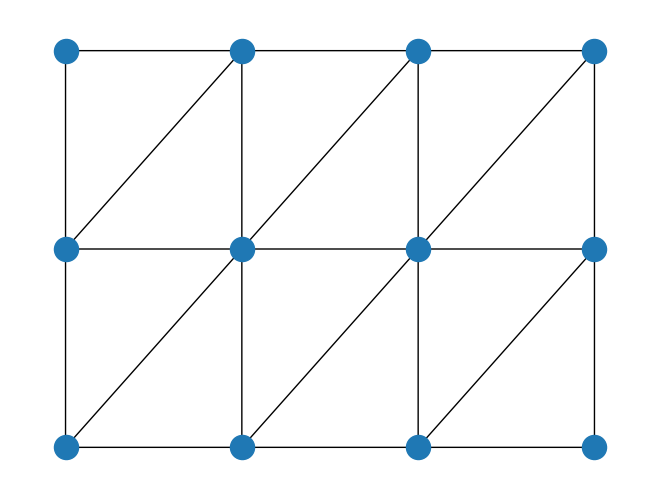

In [14]:
rows = 4
cols = 3
boundary_condition = BoundaryCondition.OPEN

triangular_lattice = TriangularLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)

triangular_lattice.draw()

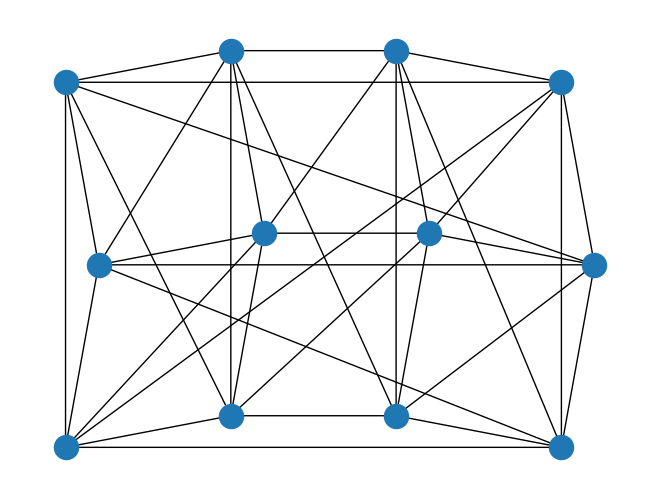

In [15]:
rows = 4
cols = 3
boundary_condition = BoundaryCondition.PERIODIC

triangular_lattice = TriangularLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)

triangular_lattice.draw()

## General Lattice
Above, we have seen translational invariant lattices.
Here, we consider a general lattice.
We can construct a general lattice consisting of nodes and edges using an instance of PyGraph.

In [16]:
graph = rx.PyGraph(multigraph=False)  # multigraph shoud be False
graph.add_nodes_from(range(6))
weighted_edge_list = [
    (0, 1, 1.0 + 1.0j),
    (0, 2, -1.0),
    (2, 3, 2.0),
    (4, 2, -1.0 + 2.0j),
    (4, 4, 3.0),
    (2, 5, -1.0),
]
graph.add_edges_from(weighted_edge_list)

# make a lattice
general_lattice = Lattice(graph)
set(general_lattice.graph.weighted_edge_list())

{(0, 1, (1+1j)),
 (0, 2, -1.0),
 (2, 3, 2.0),
 (2, 5, -1.0),
 (4, 2, (-1+2j)),
 (4, 4, 3.0)}

Here is its visualization.

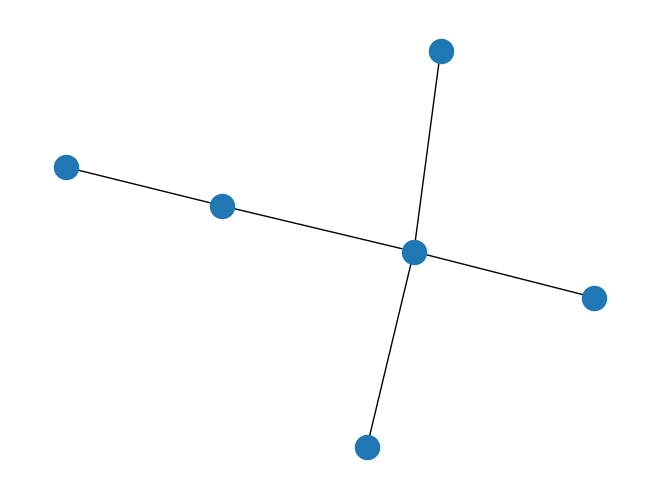

In [17]:
general_lattice.draw()

When we want to visualize the self-loops in the lattice, we set `self_loop` to True.

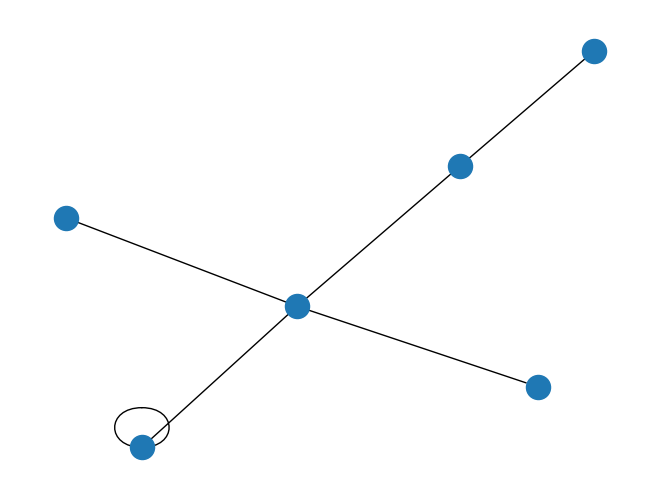

In [18]:
general_lattice.draw(self_loop=True)

The labels of the lattice sites are drawn when `with_labels` is True.

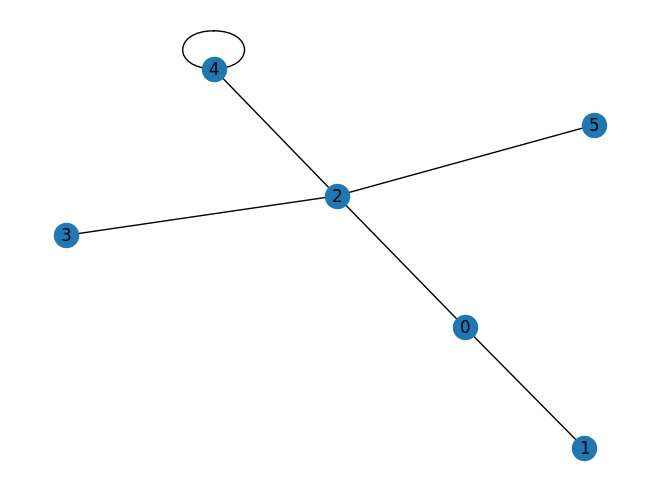

In [19]:
general_lattice.draw(self_loop=True, style=LatticeDrawStyle(with_labels=True))

## The Fermi-Hubbard model
The Fermi-Hubbard model is the simplest model describing electrons moving on a lattice and interaction with each other at the same site.
The Hamiltonian is given as follows:

$$
H = \sum_{i, j}\sum_{\sigma = \uparrow, \downarrow} t_{i, j} c_{i, \sigma}^\dagger c_{j, \sigma} + U \sum_{i} n_{i, \uparrow} n_{i, \downarrow},
$$

where $c_{i, \sigma}^\dagger$ and $c_{i, \sigma}$ are creation and annihilation operators of fermion at the site $i$ with spin $\sigma$.
The operator $n_{i, \sigma}$ is the number operator, which is defined by $n_{i, \sigma} = c_{i, \sigma}^\dagger c_{i, \sigma}$. 
The matrix $t_{i, j}$ is a Hermitian matrix called interaction matrix.
The parameter $U$ represents the strength of the interaction.

We can generate the corresponding Hamiltonian of a given lattice using `FermiHubbardModel` class.
Here, we construct the Hamiltonian with uniform interaction and interaction parameters on a two-dimensional lattice.

In [20]:
square_lattice = SquareLattice(rows=5, cols=4, boundary_condition=BoundaryCondition.PERIODIC)

t = -1.0  # the interaction parameter
v = 0.0  # the onsite potential
u = 5.0  # the interaction parameter U

fhm = FermiHubbardModel(
    square_lattice.uniform_parameters(
        uniform_interaction=t,
        uniform_onsite_potential=v,
    ),
    onsite_interaction=u,
)

To obtain the Hamiltonian in terms of the fermionic operators, we use `second_q_ops` method.
The Hamiltonian is returned as an instance of `FermionicOp`.

- Note
    - The number of fermionic operators required is twice the number of lattice sites because of the spin degrees of freedom.
    - In the implementation, even indexes correspond to up-spin and odd indexes to down-spin.

In [21]:
ham = fhm.second_q_op().simplify()
print(ham)

Fermionic Operator
number spin orbitals=40, number terms=180
  (-1+0j) * ( +_0 -_2 )
+ (1+0j) * ( -_0 +_2 )
+ (-1+0j) * ( +_0 -_10 )
+ (1+0j) * ( -_0 +_10 )
+ (-1+0j) * ( +_10 -_12 )
+ (1+0j) * ( -_10 +_12 )
+ (-1+0j) * ( +_10 -_20 )
+ (1+0j) * ( -_10 +_20 )
+ (-1+0j) * ( +_20 -_22 )
+ (1+0j) * ( -_20 +_22 )
+ (-1+0j) * ( +_20 -_30 )
+ (1+0j) * ( -_20 +_30 )
+ (-1+0j) * ( +_30 -_32 )
+ (1+0j) * ( -_30 +_32 )
+ (-1+0j) * ( +_2 -_4 )
+ (1+0j) * ( -_2 +_4 )
+ (-1+0j) * ( +_2 -_12 )
+ (1+0j) * ( -_2 +_12 )
+ (-1+0j) * ( +_12 -_14 )
+ (1+0j) * ( -_12 +_14 )
+ (-1+0j) * ( +_12 -_22 )
+ (1+0j) * ( -_12 +_22 )
+ (-1+0j) * ( +_22 -_24 )
+ (1+0j) * ( -_22 +_24 )
+ (-1+0j) * ( +_22 -_32 )
+ (1+0j) * ( -_22 +_32 )
+ (-1+0j) * ( +_32 -_34 )
+ (1+0j) * ( -_32 +_34 )
+ (-1+0j) * ( +_4 -_6 )
+ (1+0j) * ( -_4 +_6 )
+ (-1+0j) * ( +_4 -_14 )
+ (1+0j) * ( -_4 +_14 )
+ (-1+0j) * ( +_14 -_16 )
+ (1+0j) * ( -_14 +_16 )
+ (-1+0j) * ( +_14 -_24 )
+ (1+0j) * ( -_14 +_24 )
+ (-1+0j) * ( +_24 -_26 )
+ (1+0j) * ( 

`Lattice` has weights on its edges, so we can define a general interaction matrix using a Lattice instance.
Here, we consider the Fermi-Hubbard model on a general lattice on which non-uniform interaction parameters are given.
In this case, the weights of the lattice are regarded as the interaction matrix. After generating the Hamiltonian (`second_q_ops`) we can use a qubit mapper to generate the qubit operators and/or use any of the available algorithms to solver the corresponding lattice problem.

In [22]:
graph = rx.PyGraph(multigraph=False)  # multiigraph shoud be False
graph.add_nodes_from(range(6))
weighted_edge_list = [
    (0, 1, 1.0 + 1.0j),
    (0, 2, -1.0),
    (2, 3, 2.0),
    (4, 2, -1.0 + 2.0j),
    (4, 4, 3.0),
    (2, 5, -1.0),
]
graph.add_edges_from(weighted_edge_list)

general_lattice = Lattice(graph)  # the lattice whose weights are seen as the interaction matrix.
u = 5.0  # the interaction parameter U

fhm = FermiHubbardModel(lattice=general_lattice, onsite_interaction=u)

ham = fhm.second_q_op().simplify()
print(ham)

Fermionic Operator
number spin orbitals=12, number terms=28
  (1+1j) * ( +_0 -_2 )
+ (-1+1j) * ( -_0 +_2 )
+ (-1+0j) * ( +_0 -_4 )
+ (1+0j) * ( -_0 +_4 )
+ (2+0j) * ( +_4 -_6 )
+ (-2+0j) * ( -_4 +_6 )
+ (-1-2j) * ( +_4 -_8 )
+ (1-2j) * ( -_4 +_8 )
+ (3+0j) * ( +_8 -_8 )
+ (-1+0j) * ( +_4 -_10 )
+ (1+0j) * ( -_4 +_10 )
+ (1+1j) * ( +_1 -_3 )
+ (-1+1j) * ( -_1 +_3 )
+ (-1+0j) * ( +_1 -_5 )
+ (1+0j) * ( -_1 +_5 )
+ (2+0j) * ( +_5 -_7 )
+ (-2+0j) * ( -_5 +_7 )
+ (-1-2j) * ( +_5 -_9 )
+ (1-2j) * ( -_5 +_9 )
+ (3+0j) * ( +_9 -_9 )
+ (-1+0j) * ( +_5 -_11 )
+ (1+0j) * ( -_5 +_11 )
+ (5+0j) * ( +_0 -_0 +_1 -_1 )
+ (5+0j) * ( +_2 -_2 +_3 -_3 )
+ (5+0j) * ( +_4 -_4 +_5 -_5 )
+ (5+0j) * ( +_6 -_6 +_7 -_7 )
+ (5+0j) * ( +_8 -_8 +_9 -_9 )
+ (5+0j) * ( +_10 -_10 +_11 -_11 )


## LatticeModelProblem
Qiskit Nature also has a `LatticeModelProblem` class which allows the usage of the `GroundStateEigensolver` to calculate the ground state energy of a given lattice. You can use this class as follows:

In [23]:
from qiskit_nature.second_q.problems import LatticeModelProblem

num_nodes = 4
boundary_condition = BoundaryCondition.OPEN
line_lattice = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)

fhm = FermiHubbardModel(
    line_lattice.uniform_parameters(
        uniform_interaction=t,
        uniform_onsite_potential=v,
    ),
    onsite_interaction=u,
)

lmp = LatticeModelProblem(fhm)

In [24]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper

numpy_solver = NumPyMinimumEigensolver()

qubit_mapper = JordanWignerMapper()

calc = GroundStateEigensolver(qubit_mapper, numpy_solver)
res = calc.solve(lmp)

print(res)

=== GROUND STATE ===
 
* Lattice ground state energy : -2.566350190841


In [25]:
import tutorial_magics

%qiskit_version_table
%qiskit_copyright